# General overview

This notebook aims to create simple and descriptive analysis of working papers published by National Bureau of Economic Research ([NBER](https://www.nber.org/)). You may want to create more sophisticated analysis using the dataset, which is publicly available on my GitHub repository.

In [1]:
# load module and data
import analysis

nber = analysis.get_data("nber")
repec = analysis.get_data("repec")

# How many papers published by NBER each year?

As of December 31, 2024 there are 33,318 working papers published by NBER. The earliest working paper available was in 1973, titled ["Education, Information, and Efficiency"](https://www.nber.org/papers/w0001) by Finis Welch. Interestingly, numbers of papers being published by NBER each year has been increasing since then.

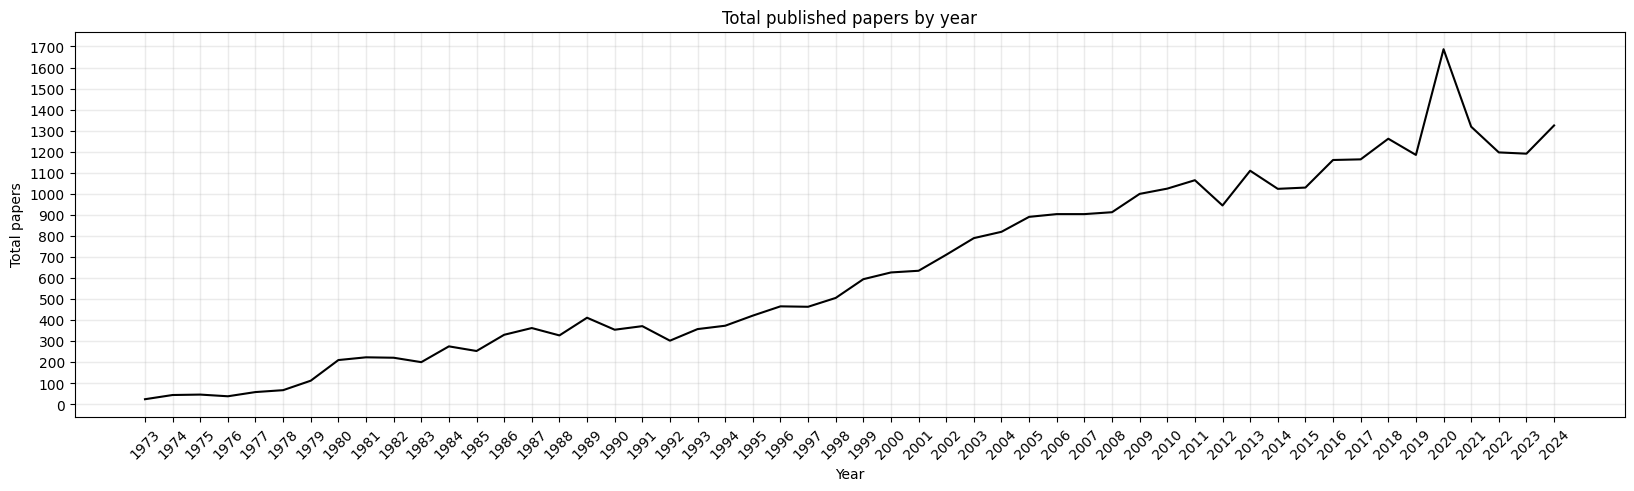

In [2]:
analysis.published_paper(df=analysis.count_by_year(nber),
                         title="Total published papers by year",
                         x_interval=1,
                         y_interval=100,
                         y_max=100)

# What do economists disclose in their papers?

## Counts of "thank"
One of public information that is provided by NBER is acknowledgements and disclosures. In some cases, researchers disclose or express gratitude to their collaborators, funders, and research assistants. In this case, I want to see the trends of the word "thank" appearing in economics papers. It is interesting to see that it started to dramatically increase in the early twenty-first century, especially since 2005. 

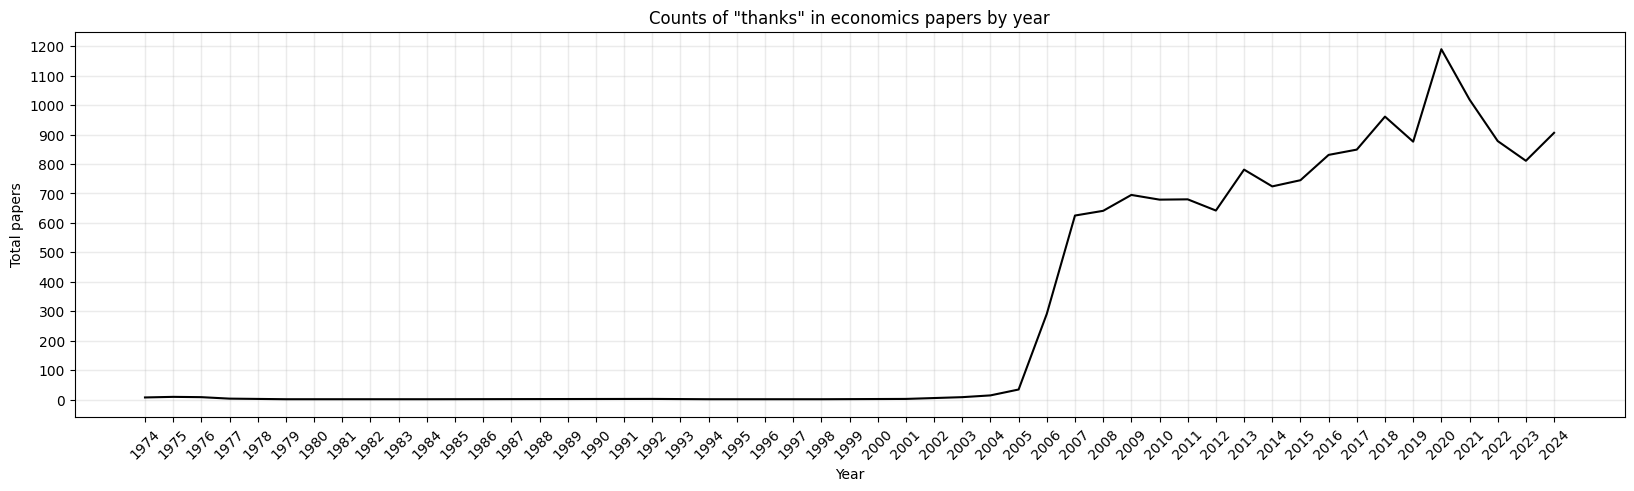

In [3]:
analysis.section_trends(df=nber,
                        column="acknowledgement",
                        title="Counts of \"thanks\" in economics papers by year",
                        keyword="thank",
                        x_interval=1,
                        y_interval=100,
                        y_max=100)

## Counts of "fund"

We can also see if this is true in another case. When did economists start to disclose their funding? Below, we can see the trend started to occur around the same time as the time when economists say "thank" in their acknowledgements and disclosures. Do you wonder why?

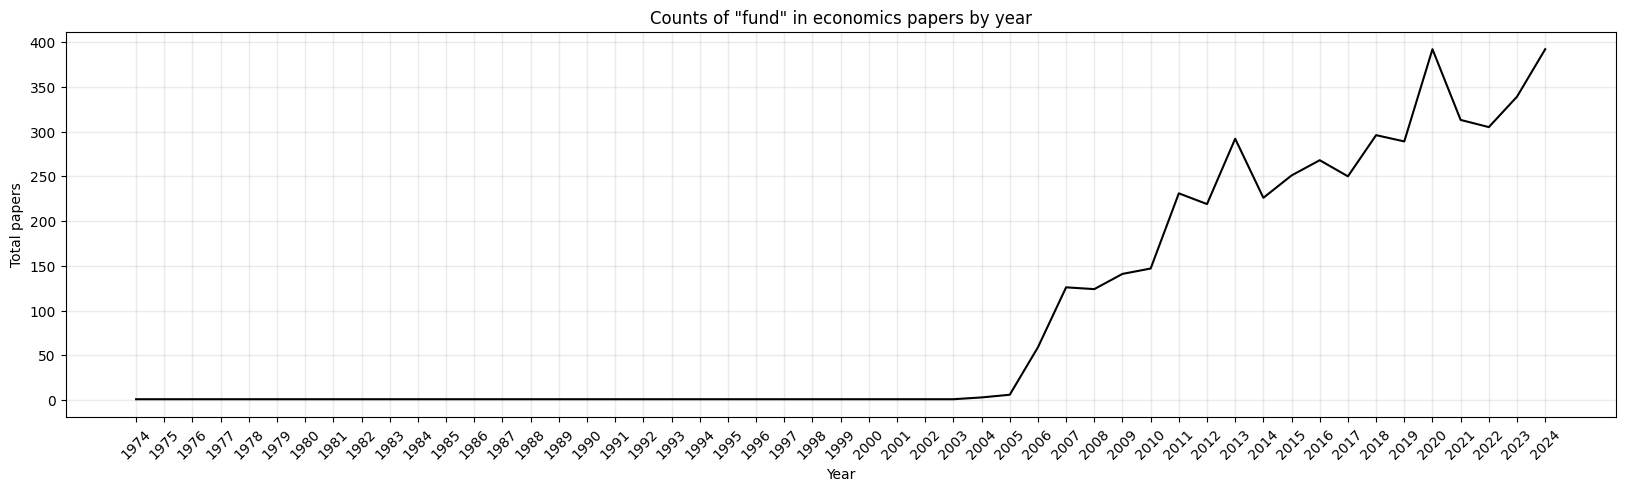

In [4]:
analysis.section_trends(df=nber,
                        column="acknowledgement",
                        title="Counts of \"fund\" in economics papers by year",
                        keyword="fund",
                        x_interval=1,
                        y_interval=50,
                        y_max=50)

## Counts of "excellent research"

Especially for applied economists, they often hire research assistants to help their projects. We can see that the trend also happened around the same time as to economists started to say "thank" in their acknowledgement section. Personally, this begs two major questions:

1. Did NBER start to collect data around 2005?
2. Did economists start to disclose this information around 2005? If so, why?

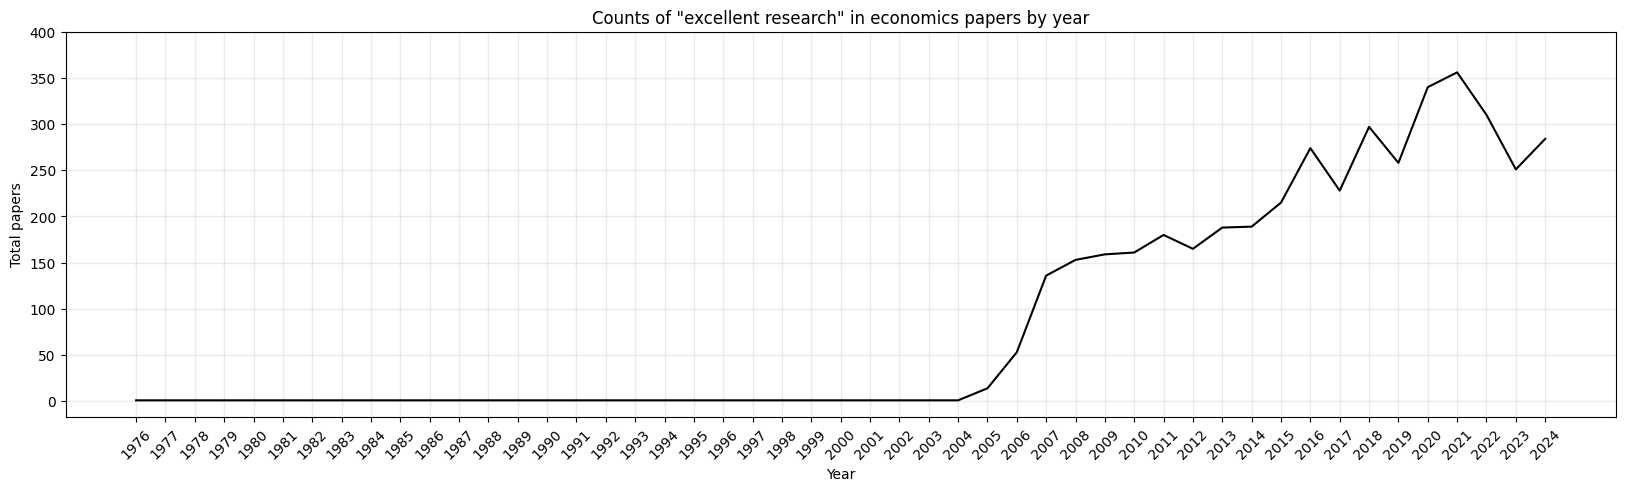

In [5]:
analysis.section_trends(df=nber,
                        column="acknowledgement",
                        title="Counts of \"excellent research\" in economics papers by year",
                        keyword="excellent research",
                        x_interval=1,
                        y_interval=50,
                        y_max=50)

# Are you one of their research assistants/pre-doctoral fellows?

We can also see economists who often express their gratitude, perhaps to their research assistants. Why is that so? Sometimes, you can see in the acknowledgement section, they say "thank you for excellent research" to their research assistants. Here you can see that one of them won the Nobel Prize in Economic Science. Can you guess who?

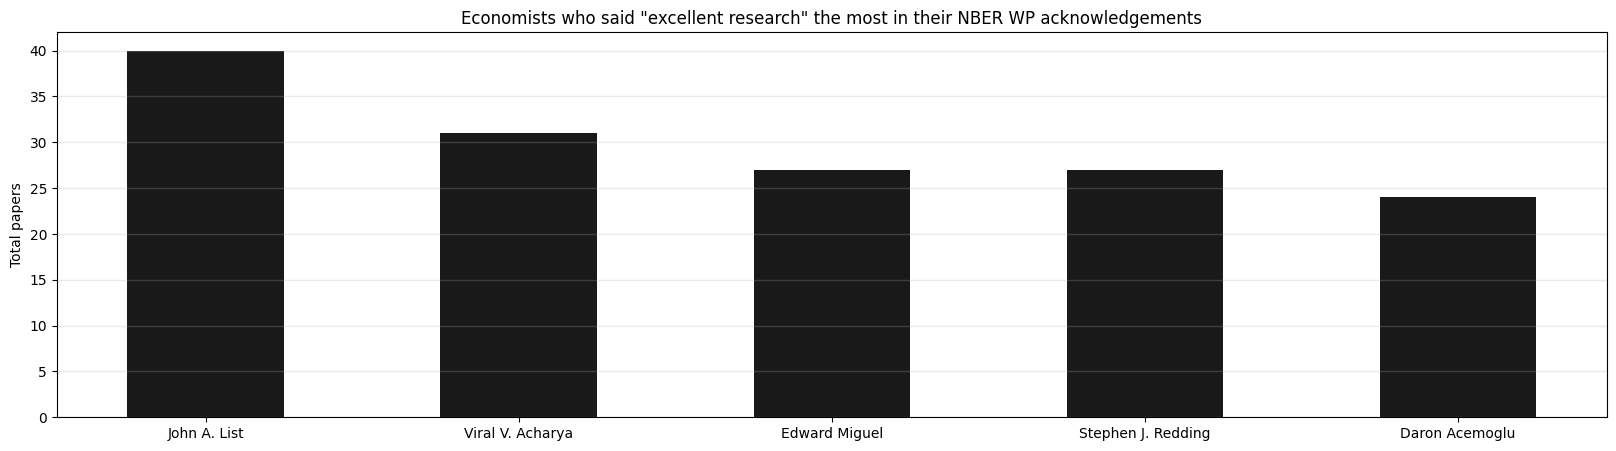

In [6]:
excellent = nber[(nber["acknowledgement"].isna() == False) & (nber["acknowledgement"].str.contains("excellent research"))]
excellent = analysis.top_five(df=excellent, column="citation_author").reset_index(drop=True)
analysis.bar_plot(df=excellent,
                  label="Economists",
                  title="Economists who said \"excellent research\" the most in their NBER WP acknowledgements",
                  column="citation_author")

# Do economists collaborate?

NBER provides a list of authors for each paper. This can be useful to see whether economics as a field of study is increasingly collaborative or not. One of the ways to do that is by looking at total authors per paper. Then, we can aggregate the numbers by year. Below, we can see that it is indeed true that economics has been more collaborative than it used to be, although it does not increase that much. Why is that so?

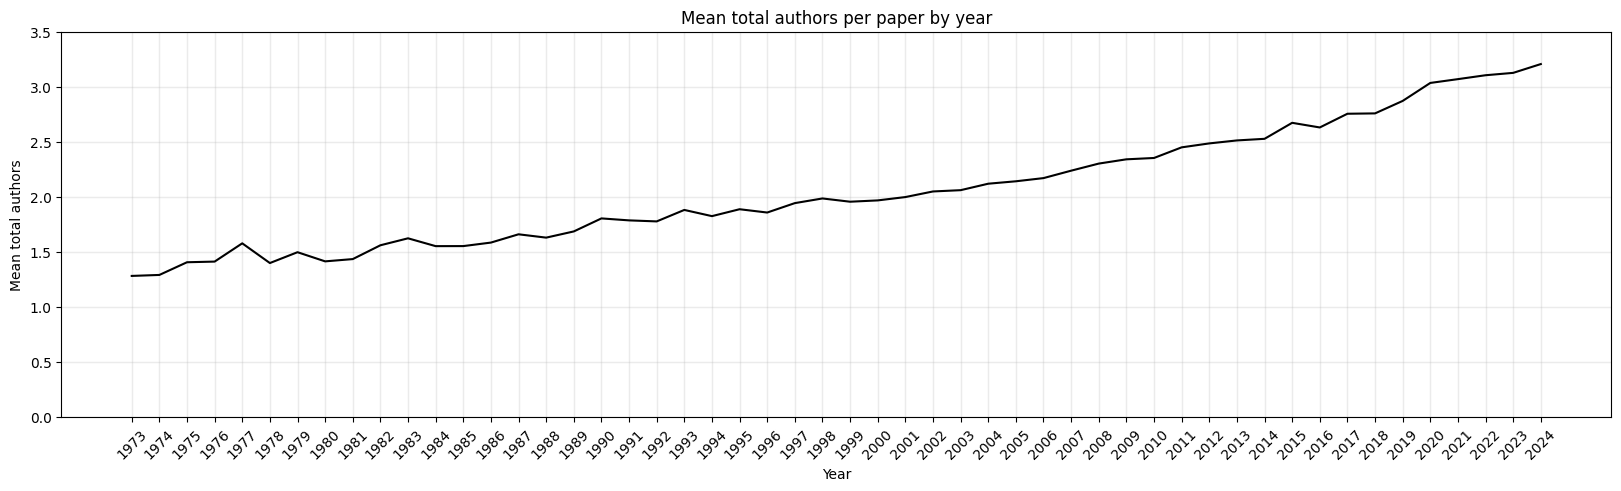

In [7]:
analysis.collaboration(df=nber, y_interval=0.5, y_max=0.5)

# What do economists say in the abstract?

Another interesting thing to analyze is that what do economists say in the abstract section? Current technology allows us to analyze text data. Here, I want to highlight one simple thing that we can do, namely by looking at keywords. For example, say we are interested to know when did randomized controlled trial (RCT) become more popular among economists? Interestingly, working papers published by NBER which contain "randomized controlled trial" in the abstract section has increased dramatically from 2016 to 2019. You may also realize that in 2019, Nobel Prize in Economic Sciences were awarded to economists who dedicate their life in the methodology.

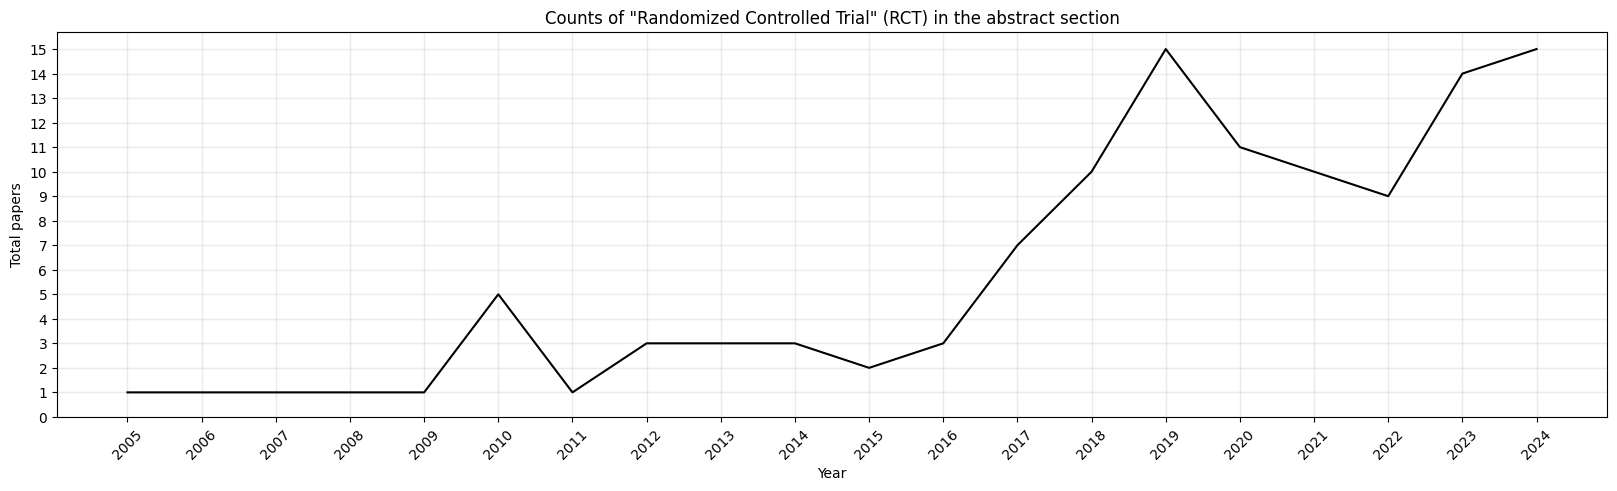

In [8]:
analysis.section_trends(df=nber,
                        column="abstract",
                        title="Counts of \"Randomized Controlled Trial\" (RCT) in the abstract section",
                        keyword="randomized controlled trial",
                        x_interval=1,
                        y_interval=1,
                        y_max=1)

# What do economists study about, mostly?

## Five most popular topics among economists

Like music or movies, economics also has genres, or research topics. NBER published working papers on various topics, such as education, labor, and macroeconomics. Each paper can contain more than one topics. We can see that macroeconomics is the most popular topic among others.

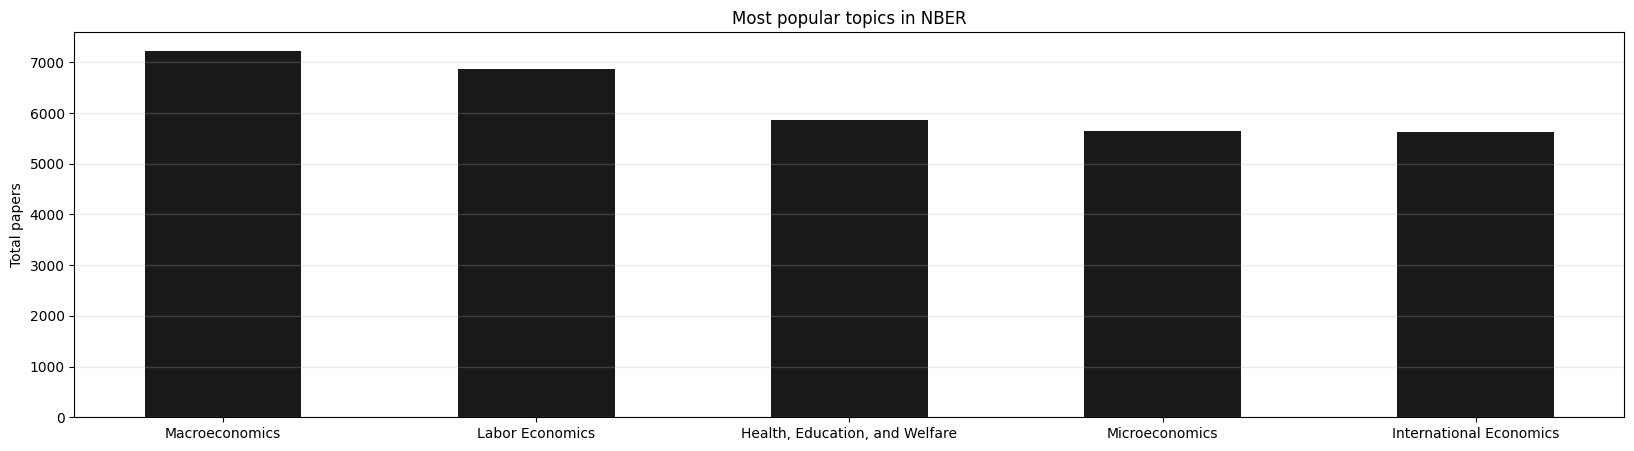

In [9]:
analysis.bar_plot(df=analysis.top_five(nber),
                  label="Topics",
                  title="Most popular topics in NBER",
                  column="topics")

## Counts of papers that belong five most popular topics by year

Among these five topics, we can also see the trends by year. It is interesting to see that NBER did not really publish economics paper that specifically talk about "Health, Education, and Welfare" until around 1991, but they are now the most popular topic.

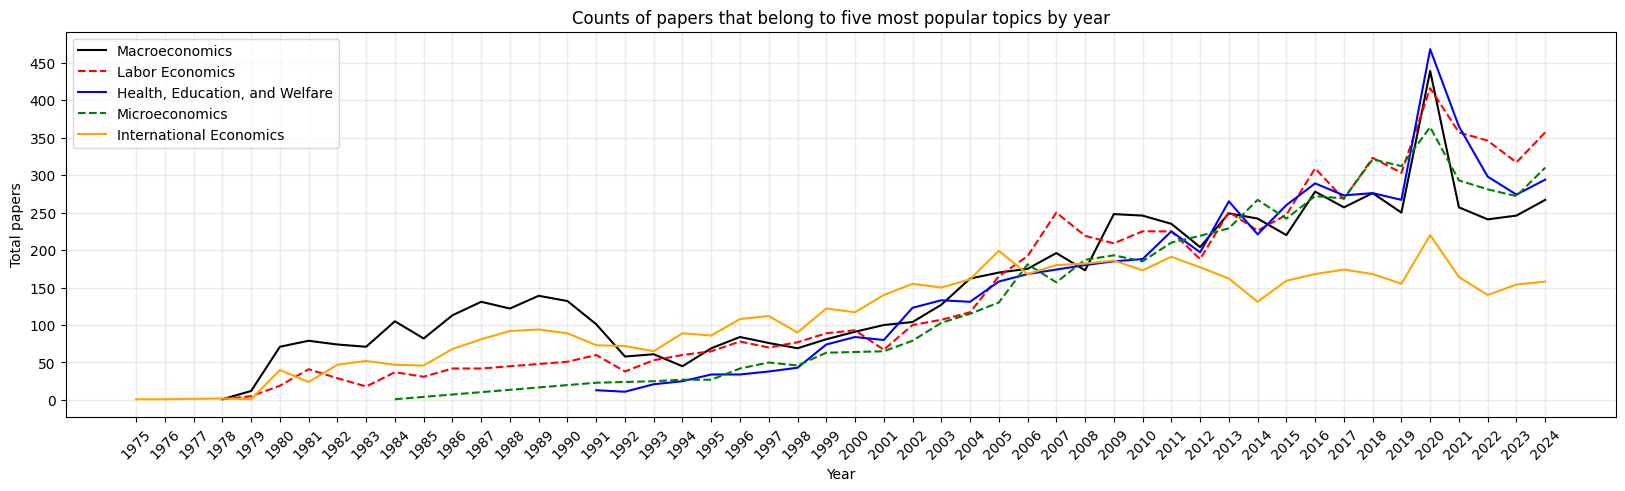

In [10]:
analysis.top_five_trends(df=nber,
                         column="topics",
                         title="Counts of papers that belong to five most popular topics by year",
                         y_interval=50)

# Publish or perish? No, publish and publish!

## How many papers economists write?

As expected, vast majority of economists publish around one paper, while only a few of them write a lot more. Who, among them, have written more than 100 papers? We can see below five economists who have the highest numbers of publshed working papers by NBER.

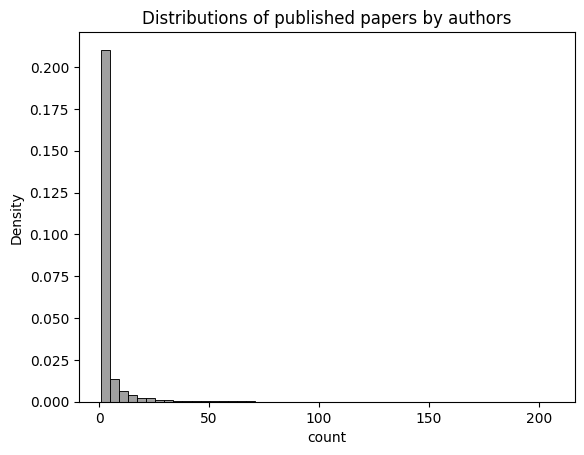

In [11]:
analysis.distribution(df=nber)

## Top five authors published by NBER
You may have heard such phrase in academia, right? Well, these economists seem to write a lot! One of them even won Nobel Prize in Economic Sciences in 2024.

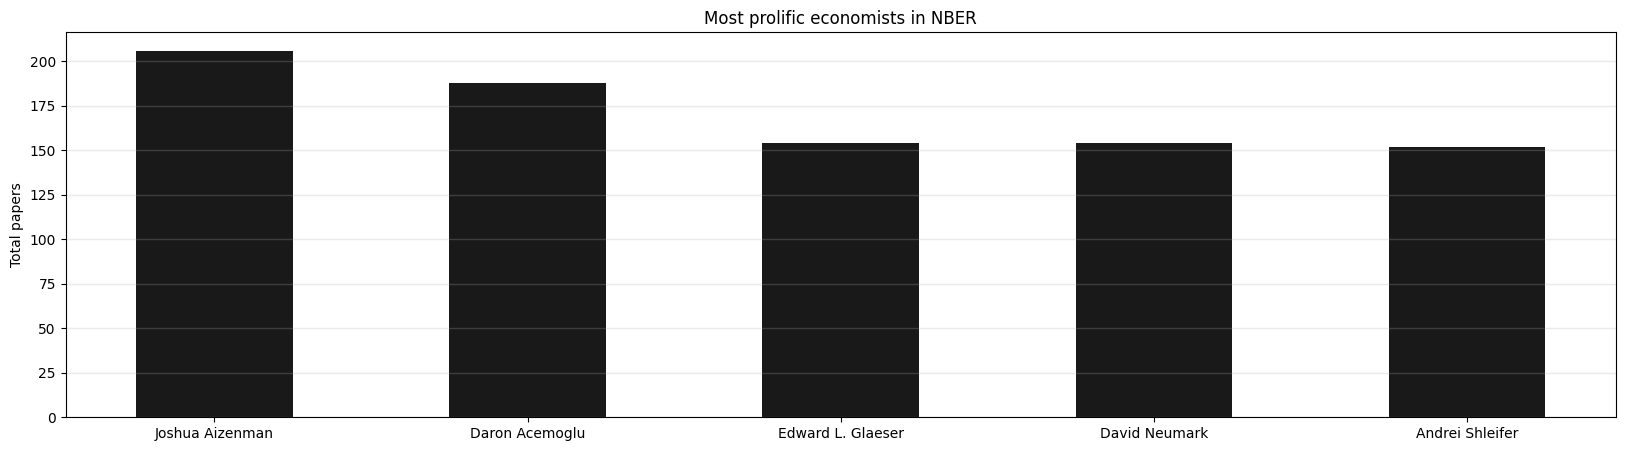

In [12]:
analysis.bar_plot(df=analysis.top_five(df=nber, column="citation_author"),
                  label="Economists",
                  title="Most prolific economists in NBER",
                  column="citation_author")

## How many papers do these economists publish by year?

You may wonder how many papers do these economists publish each year. We can see the variations among them. Some of them started publishing in the 1980s. Some of them in 1990s. Daron Acemoglu started quite late compared to the other four, but he stands out among others in 2000s. Even in 2014 he published 15 working papers on NBER!

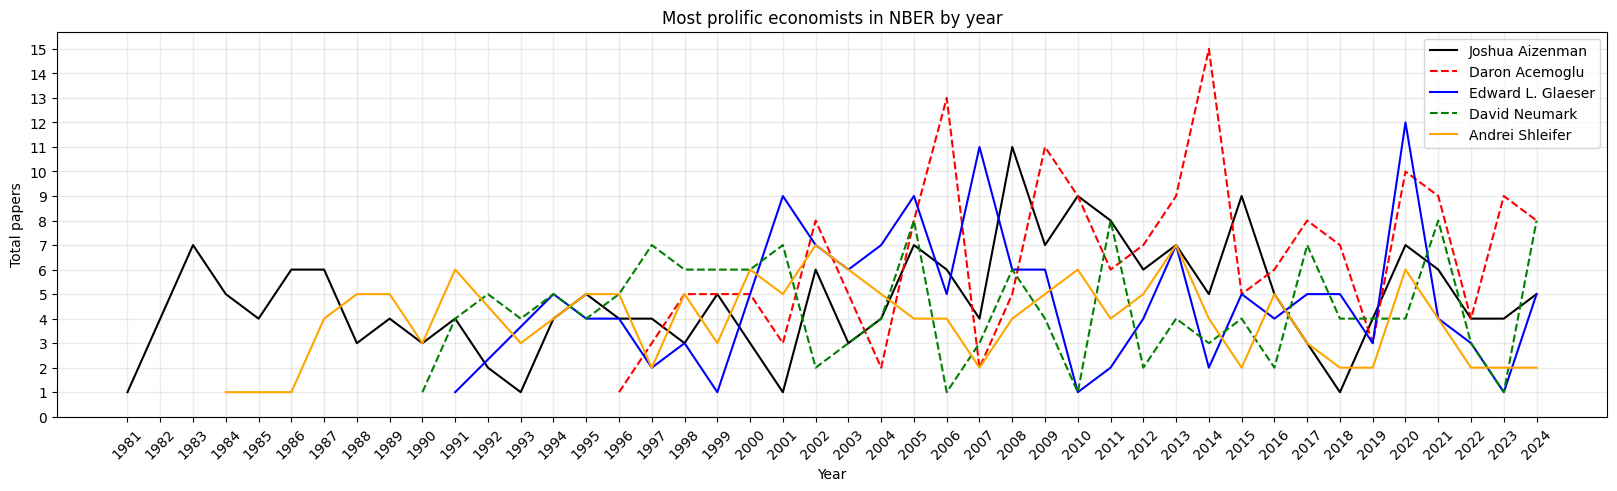

In [13]:
analysis.top_five_trends(df=nber,
                         column="citation_author",
                         title="Most prolific economists in NBER by year",
                         y_interval=1)

# Summary

NBER provide public information that can be fun to play around. The analysis provided here is simple. However, we can learn a few things such as economists are getting more collaborative and more transparent when it comes to funding. You can of course create more sophisticated analysis based on this data. Feel free to use the code and data from my GitHub repository. All erros are my own. Thank you.